**Context**

The dataset was scraped from Master of Malt (https://www.masterofmalt.com/). You can refer to my scraping code at Github.

**Content**

- Bottle_name: Name of whisky
- Brand: Japanese whisky brand. This dataset covers 4 brands:
    - Hibiki (響)
    - Yamazaki (山崎)
    - Hakushu (白州)
    - Nikka (ニッカ)
- Title: Title of each review
- Review_Content: Review content

This dataset includes 1130 reviews of 50 Japanese whisky.

**References**
- https://www.fas.usda.gov/data/japan-market-overview-whiskey-japan
- https://www.kaggle.com/datasets/koki25ando/japanese-whisky-review


In [1]:
## Libarary Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('japanese_whisky_review.csv')
df.head()

,Unnamed: 0,Bottle_name,Brand,Title,Review_Content
0,1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...
1,2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious! sugared red fruits and sweet with a...
2,3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
3,4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh..."
4,5,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it - fresh but not thin ...


In [3]:
df=df.iloc[:,1:]
df.head()

,Bottle_name,Brand,Title,Review_Content
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious! sugared red fruits and sweet with a...
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh..."
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it - fresh but not thin ...


In [4]:
df['Bottle_name'].unique()

array(['The Yamazaki Single Malt Whisky - Distiller’s Reserve',
       'Yamazaki 12 Year Old', 'Yamazaki 18 Year Old',
       'Yamazaki 10 Year Old', 'Yamazaki Sherry Cask 2016',
       'Yamazaki Bourbon Barrel 2013 (48.2%)',
       'Yamazaki Bourbon Barrel 2013 (48%)', 'Yamazaki Puncheon 2013',
       'Yamazaki Mizunara 2012', 'Yamazaki 25 Year Old',
       'Yamazaki Mizunara 2013', 'Yamazaki Sherry Cask 2013',
       'Yamazaki 50 Year Old', 'Yamazaki 1984',
       'The Yamazaki Mizunara 18 Year Old (2017 Edition)',
       'Hibiki Japanese Harmony',
       'Hibiki 35 Year Old by Tokuda Yasokichi III',
       "Hibiki Japanese Harmony Master's Select", 'Hibiki 17 Year Old',
       'Hibiki 30 Year Old', 'Hibiki 21 Year Old', 'Hibiki 12 Year Old',
       'Hibiki 12 Year Old 50cl',
       'The Hakushu Single Malt Whisky - Distiller’s Reserve',
       'Hakushu 12 Year Old', 'Hakushu 18 Year Old',
       'Hakushu 25 Year Old ', 'Hakushu Bourbon Barrel',
       'Hakushu 12 Year Old 43.5%', 'H

In [5]:
df['Brand'].unique()

array(['Yamazaki', 'Hibiki', 'Hakushu', 'Nikka'], dtype=object)

In [6]:
df['Title'].nunique()

1034

In [7]:
df['Review_Content'].nunique()

1119

In [8]:
df.shape

(1130, 4)

### Data Cleaning

In [9]:
import re
def cleanTxt(text):
    text=re.sub(r"[\([{})\]]", "", str(text))   
    text=re.sub(r'#','',str(text))   
    text=re.sub("\'", "",str(text))
    text=re.sub("\W'", "",str(text))
    text=re.sub("-'", "",str(text))
    text=re.sub(",", "",str(text))
    text=re.sub("-", "",str(text))
    text=re.sub("!", "",str(text))
    text = re.sub(r'[?\'"]', '', text)
#     clean_text = re.sub(r"'", " ", str(text))
    text=re.sub('\s+', ' ', str(text))
    text=re.sub('\S*@\S*\s?', '', str(text)) 
    return text


In [10]:
df.columns

Index(['Bottle_name', 'Brand', 'Title', 'Review_Content'], dtype='object')

In [11]:
##Cleaning the text
df.iloc[:,3]=df.iloc[:,3].apply(cleanTxt)
# df.iloc[:,2]=df_l.iloc[:,2].apply(cleanTxt)
df.head()

,Bottle_name,Brand,Title,Review_Content
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Overhyped a...
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious sugared red fruits and sweet with a ...
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,This is a terrible Yamazaki. Very young unsher...
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it fresh but not thin an...


In [12]:
df['Review_Content'][8]

'Stands against Glenfiddich 12 in its similarities. I think this is nicer but Im not sure if thats worth the price difference.'

### Data Visualization

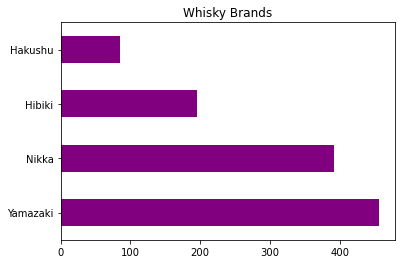

In [13]:
df['Brand'].value_counts().plot(kind='barh', color='Purple')
plt.title('Whisky Brands')
plt.show()

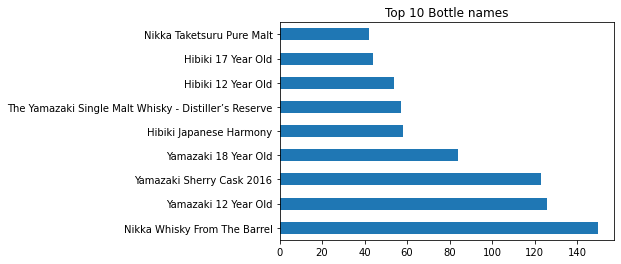

In [14]:
df['Bottle_name'].value_counts()[0:9].plot(kind='barh')
plt.title('Top 10 Bottle names')
plt.show()

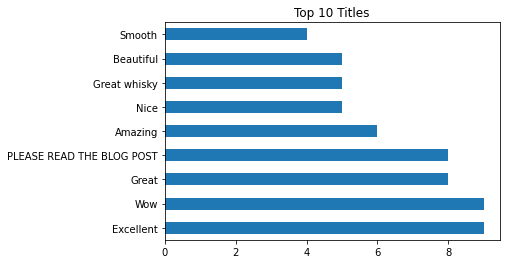

In [15]:
df['Title'].value_counts()[0:9].plot(kind='barh')
plt.title('Top 10 Titles')
plt.show()

In [16]:
df.columns

Index(['Bottle_name', 'Brand', 'Title', 'Review_Content'], dtype='object')

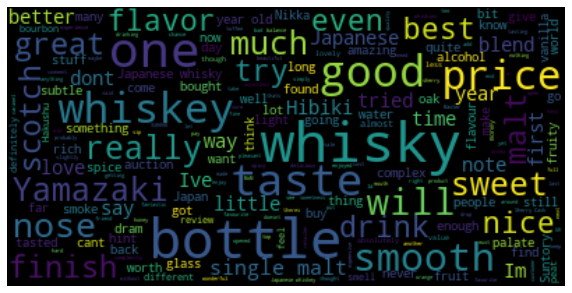

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
plt.figure(figsize=(10,6))
wordcloud_c=WordCloud(max_font_size=40,relative_scaling=.5,stopwords=stopwords).generate(df['Review_Content'].str.cat())
plt.imshow(wordcloud_c, interpolation="bilinear") 
plt.axis('off')
plt.margins(x=0, y=0) 
plt.show()
# plt.savefig("comments_reviews.png")

### Calculate Sentiments

In [18]:
##Create a function to get the subjectivity
from textblob import TextBlob
def getSubjectivity(texts):
    return TextBlob(texts).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(texts):
    return TextBlob(texts).sentiment.polarity
##Create Two new columns
df['Subjectivity_content']=df['Review_Content'].apply(getSubjectivity)
df['Polarity_content']=df['Review_Content'].apply(getPolarity)
df.head()

,Bottle_name,Brand,Title,Review_Content,Subjectivity_content,Polarity_content
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Overhyped a...,0.580000,-0.243889
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious sugared red fruits and sweet with a ...,0.550000,0.450000
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...,0.647500,0.229500
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,This is a terrible Yamazaki. Very young unsher...,0.716494,0.280329
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it fresh but not thin an...,0.566667,0.200000


In [19]:
def getAnalysis(score):
    if score<=0:
        return 'Negative'
    else:
        return 'Positive'
    
df['Analysis_review'] = df['Polarity_content'].apply(getAnalysis)  

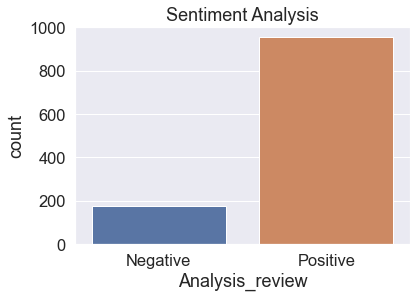

In [20]:
#Show the Value Counts
plt.figure(figsize=(6,4))
sns.set(font_scale=1.5)
sns.countplot(x='Analysis_review',data=df).set_title("Sentiment Analysis")
plt.show()
# plt.savefig('Sentiment Analysis.png')

## Analysis

In [21]:
import nltk
nltk.download('punkt')
def split_into_tokens(text):
    text=text
    return TextBlob(text).words
df.Review_Content.head().apply(split_into_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Dull, taste, High, price, No, finish, Overhyp...
1    [Delicious, sugared, red, fruits, and, sweet, ...
2    [I, am, not, a, whisky, expert, but, i, really...
3    [This, is, a, terrible, Yamazaki, Very, young,...
4    [First, time, and, I, like, it, fresh, but, no...
Name: Review_Content, dtype: object

In [22]:
nltk.download('wordnet')
def split_into_lemmas(text):
    text=text.lower()
    words=TextBlob(text).words
    return[word.lemma for word in words]
df.Review_Content.head().apply(split_into_lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [dull, taste, high, price, no, finish, overhyp...
1    [delicious, sugared, red, fruit, and, sweet, w...
2    [i, am, not, a, whisky, expert, but, i, really...
3    [this, is, a, terrible, yamazaki, very, young,...
4    [first, time, and, i, like, it, fresh, but, no...
Name: Review_Content, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer    #from sklearn module imported countvectorizer function
bow_transformer=CountVectorizer(analyzer=split_into_lemmas).fit(df.Review_Content)
print(len(bow_transformer.vocabulary_))

5425


In [24]:
df['Analysis_review1']=pd.factorize(df.Analysis_review)[0]      ###for factorize qualitative data
df['Analysis_review1'].tail()

1125    1
1126    1
1127    1
1128    1
1129    1
Name: Analysis_review1, dtype: int64

In [25]:
df.head()

,Bottle_name,Brand,Title,Review_Content,Subjectivity_content,Polarity_content,Analysis_review,Analysis_review1
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Overhyped a...,0.580000,-0.243889,Negative,0
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious sugared red fruits and sweet with a ...,0.550000,0.450000,Positive,1
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...,0.647500,0.229500,Positive,1
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,This is a terrible Yamazaki. Very young unsher...,0.716494,0.280329,Positive,1
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it fresh but not thin an...,0.566667,0.200000,Positive,1


In [26]:
x=df['Review_Content']
y=df['Analysis_review1']

### Model Development for sentiment Prediction

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,f1_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

In [28]:
data_bow=bow_transformer.transform(df['Review_Content'])
x_train =bow_transformer.transform(x_train)
x_train.shape
x_test =bow_transformer.transform(x_test)

In [29]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [30]:
print("Training set score:{:.3f}".format(logreg.score(x_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(x_test,y_test)))

Training set score:0.994
Test set score:0.859


In [31]:
pred_logreg = logreg.predict(x_test)
confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  9  35]
 [  5 234]]


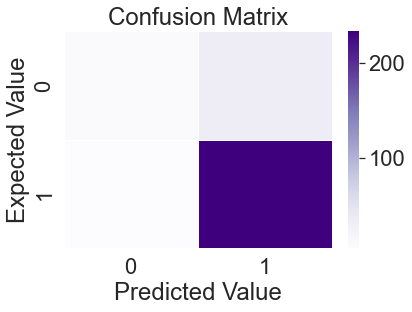

In [32]:
sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test,pred_logreg),linewidth=.5,cmap='Purples').set(xlabel='Predicted Value',ylabel='Expected Value')
plt.title("Confusion Matrix")
plt.savefig('Confusion mat.png')

In [33]:
from sklearn.metrics import roc_curve,auc
y_pred_logistic=logreg.decision_function(x_test)
log_fpr,log_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_log=auc(log_fpr,log_tpr)

In [34]:
auc_log

0.7836629897299353

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_svc=SVC(kernel='rbf',random_state=42)
model_svc.fit(x_train,y_train)
y_pred_svc=model_svc.decision_function(x_test)

In [36]:
print("Training set score:{:.3f}".format(model_svc.score(x_train,y_train)))
print("Test set score:{:.3f}".format(model_svc.score(x_test,y_test)))

Training set score:0.857
Test set score:0.852


In [37]:
svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_svc)
auc_svm=auc(svm_fpr,svm_tpr)

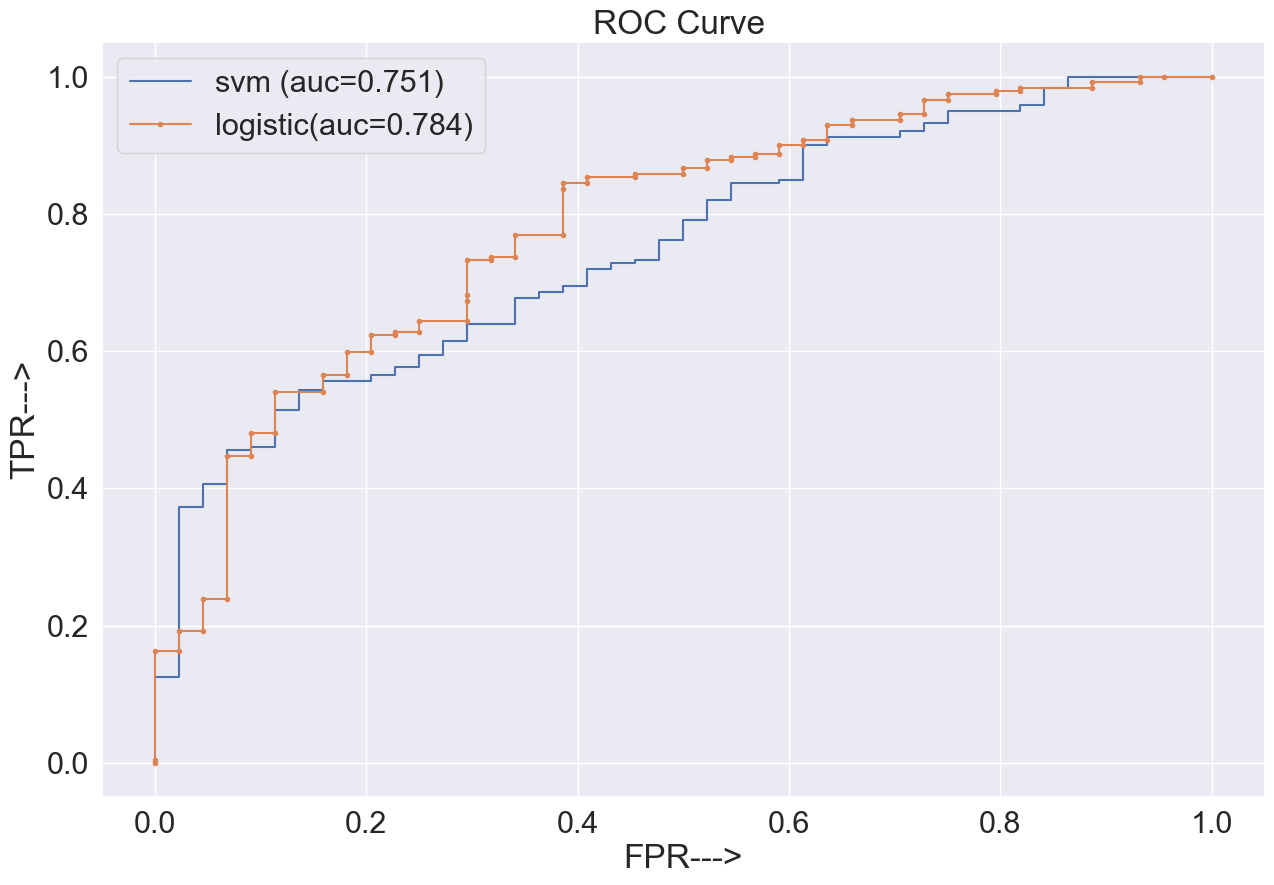

In [38]:
plt.figure(figsize=(15,10),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='svm (auc=%0.3f)' %auc_svm)
plt.plot(log_fpr,log_tpr,marker='.',label='logistic(auc=%0.3f)' %auc_log)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve ")
plt.legend()
plt.show()
# plt.savefig('ROC.png')

## Calculated Sentiment Vs. Prediected sentiment Analysis by Brand

In [39]:
pred_logreg = logreg.predict(data_bow)

In [40]:
df.columns

Index(['Bottle_name', 'Brand', 'Title', 'Review_Content',
       'Subjectivity_content', 'Polarity_content', 'Analysis_review',
       'Analysis_review1'],
      dtype='object')

In [41]:
data=pd.DataFrame({'Bottle_name':df['Bottle_name'],'Brand':df['Brand'],'Title':df['Title'],'Review_Content':df['Review_Content'],
             'Sentimentanalysis':df['Analysis_review'] ,'predicted_sentiment':pred_logreg,})
data.head()

,Bottle_name,Brand,Title,Review_Content,Sentimentanalysis,predicted_sentiment
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Overhyped a...,Negative,0
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious sugared red fruits and sweet with a ...,Positive,1
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...,Positive,1
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,This is a terrible Yamazaki. Very young unsher...,Positive,1
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it fresh but not thin an...,Positive,1


In [42]:
data['predicted_sentiment1']=data['predicted_sentiment'].apply(lambda x: 'Positive' if x==1 else 'Negative')
data.head()

,Bottle_name,Brand,Title,Review_Content,Sentimentanalysis,predicted_sentiment,predicted_sentiment1
0,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Overhyped a...,Negative,0,Negative
1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious sugared red fruits and sweet with a ...,Positive,1,Positive
2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...,Positive,1,Positive
3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,This is a terrible Yamazaki. Very young unsher...,Positive,1,Positive
4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it fresh but not thin an...,Positive,1,Positive


In [43]:
sentcat=pd.DataFrame(data.groupby('Brand')[['predicted_sentiment1','Sentimentanalysis']].value_counts(),columns=['count']).reset_index()

In [44]:
sentcat

,Brand,predicted_sentiment1,Sentimentanalysis,count
0,Hakushu,Positive,Positive,72
1,Hakushu,Negative,Negative,10
2,Hakushu,Positive,Negative,3
3,Hibiki,Positive,Positive,173
4,Hibiki,Negative,Negative,18
5,Hibiki,Positive,Negative,5
6,Nikka,Positive,Positive,332
7,Nikka,Negative,Negative,43
8,Nikka,Positive,Negative,15
9,Nikka,Negative,Positive,2


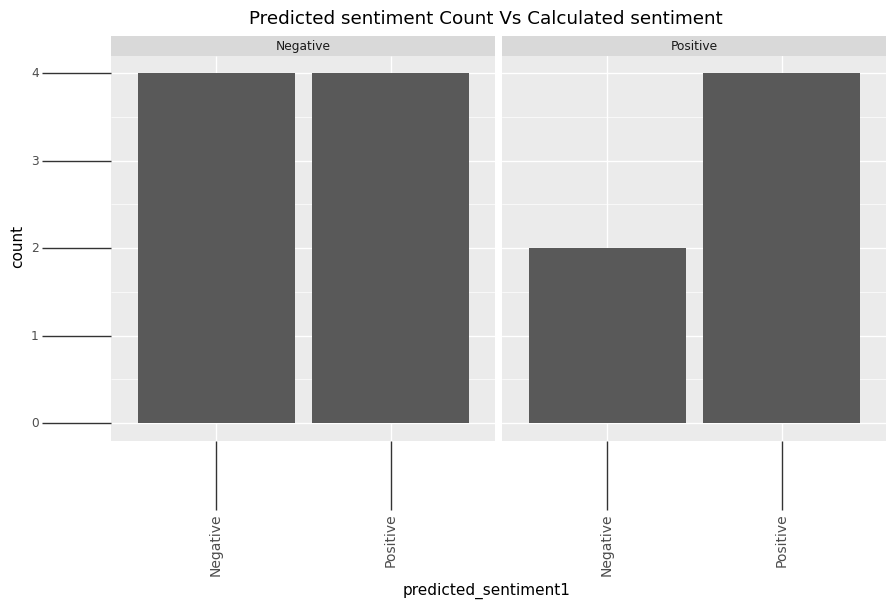

<ggplot: (148240424951)>

In [45]:
from plotnine import *
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,5),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sentcat, aes(x='predicted_sentiment1', fill='count')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Sentimentanalysis']) + flip_xlabels+ ggtitle("Predicted sentiment Count Vs Calculated sentiment"))

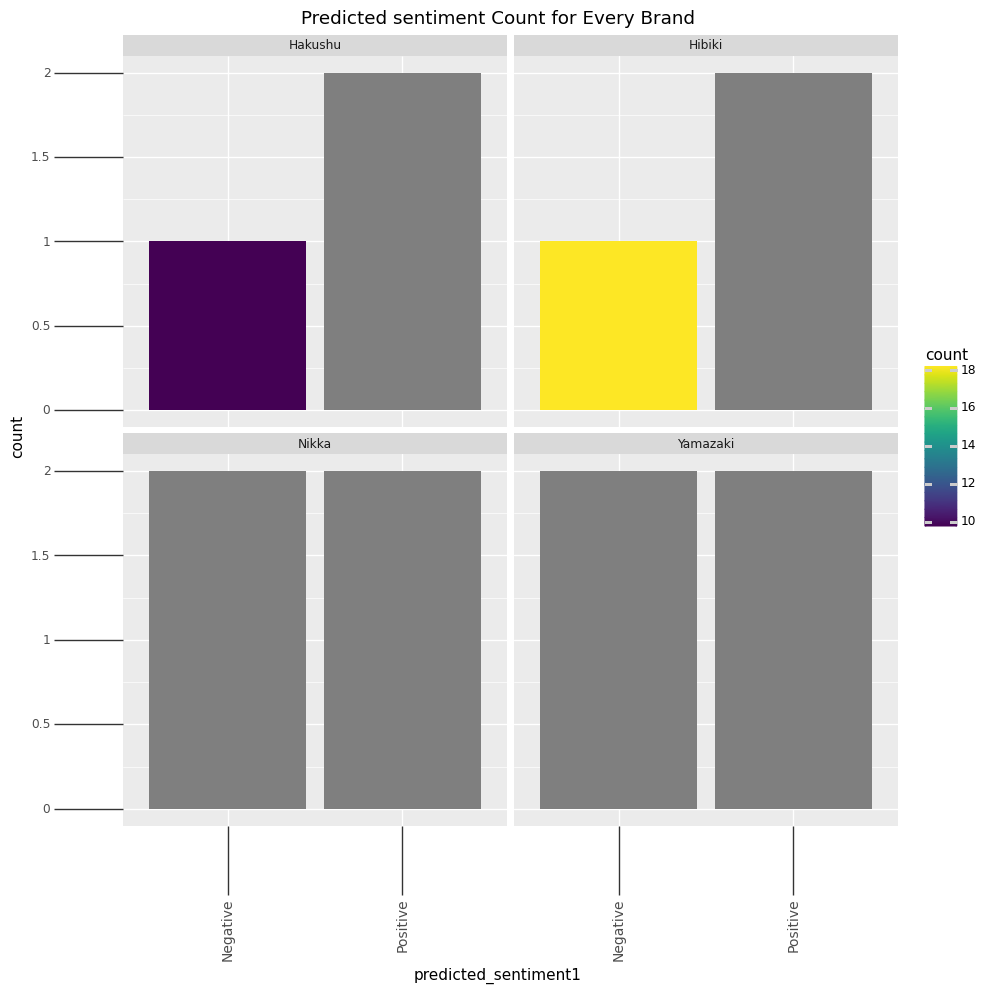

<ggplot: (148240637687)>

In [46]:
from plotnine import *
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sentcat, aes(x='predicted_sentiment1', fill='count')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Brand']) + flip_xlabels+ ggtitle("Predicted sentiment Count for Every Brand"))

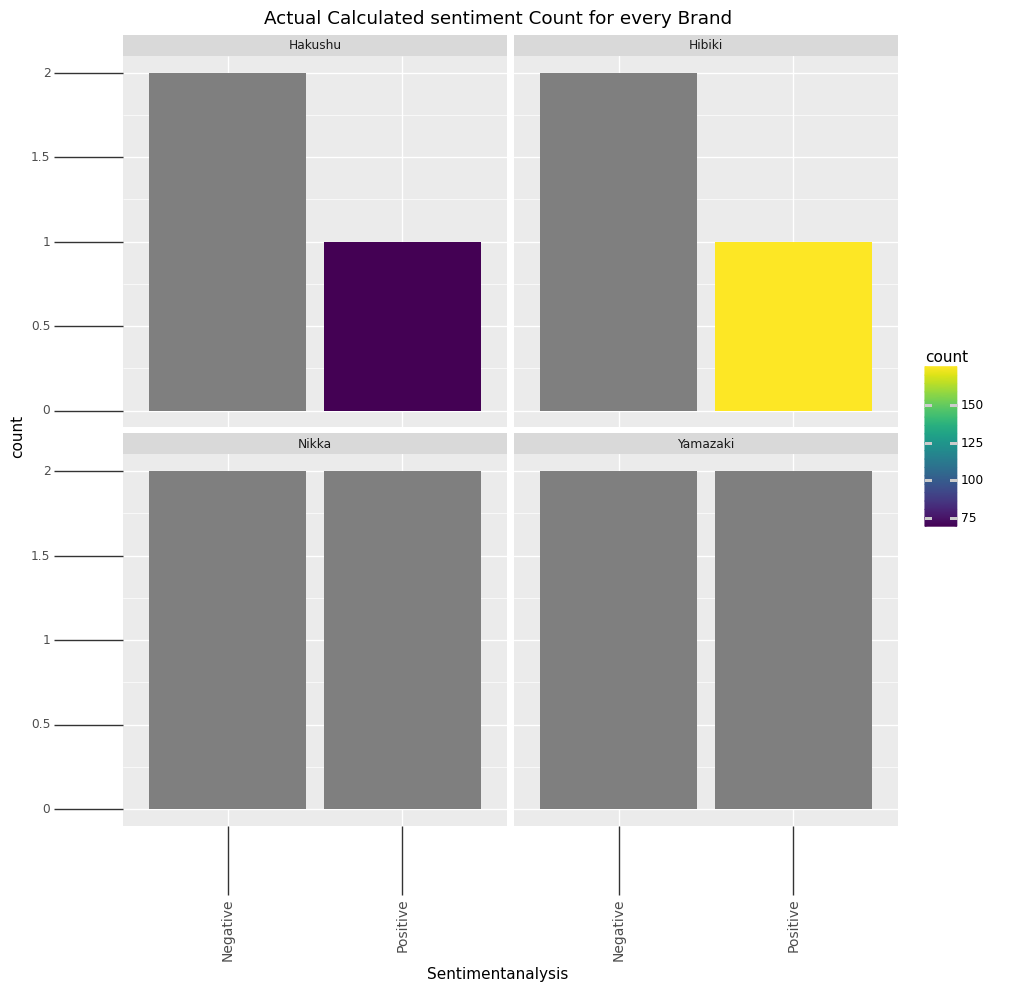

<ggplot: (148240489626)>

In [47]:
# !pip3 install plotnine
from plotnine import *
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sentcat, aes(x='Sentimentanalysis', fill='count')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Brand']) + flip_xlabels+ ggtitle("Actual Calculated sentiment Count for every Brand"))